In [83]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, matthews_corrcoef
from datasets import load_dataset
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from src.preprocessing import make_dataset, recover_split
from src.utils import read_jsonl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
DATASET_NAME = "CreativeLang/EPIC_Irony"
df = make_dataset(pd.DataFrame(load_dataset(DATASET_NAME)['train']))

In [80]:
def get_golds_preds(split):
    golds = [item['gold'] for item in split]
    preds = [item['pred'] for item in split]
    return golds, preds

def evaluate_result(result):
    outputs = []
    for split in result:
        outputs.append(evaluate_split(split))
    return outputs

def evaluate_split(split):
    golds, preds = get_golds_preds(split)
    outputs = classification_report(golds, preds, output_dict=True)
    outputs['mcc'] = matthews_corrcoef(golds, preds)
    
    return outputs
   

def group_metric(metrics, k, kk=None):
    if kk==None:
        values = [m[k] for m in metrics]
    else:
        values = [m[k][kk] for m in metrics]
    return np.round(np.min(values), 4), np.round(np.mean(values), 4), np.round(np.max(values), 4), np.round(np.std(values), 4)

def compute_metric_stats(metrics):
    for k, v in metrics[0].items():
        if isinstance(v, dict):
            for kk, vv in v.items():
                print(k, kk, group_metric(metrics, k, kk))
        else:
            print(k, group_metric(metrics, k))

NameError: name 'golds' is not defined

In [6]:
data = read_jsonl('results/clm_llama_nt.jsonl')
metrics = evaluate_result(data)
compute_metric_stats(metrics)

0 precision (0.8542, 0.8949, 0.9184, 0.0216)
0 recall (0.1853, 0.1981, 0.2138, 0.0092)
0 f1-score (0.3071, 0.3243, 0.3468, 0.0131)
0 support (421.0, 421.0, 421.0, 0.0)
1 precision (0.2533, 0.261, 0.2677, 0.0047)
1 recall (0.8915, 0.924, 0.938, 0.0166)
1 f1-score (0.3945, 0.407, 0.4165, 0.0072)
1 support (129.0, 129.0, 129.0, 0.0)
accuracy (0.3582, 0.3684, 0.3836, 0.0091)
macro avg precision (0.5537, 0.5779, 0.593, 0.0131)
macro avg recall (0.5431, 0.5611, 0.5759, 0.0107)
macro avg f1-score (0.3559, 0.3656, 0.3817, 0.0095)
macro avg support (550.0, 550.0, 550.0, 0.0)
weighted avg precision (0.7132, 0.7462, 0.7658, 0.0176)
weighted avg recall (0.3582, 0.3684, 0.3836, 0.0091)
weighted avg f1-score (0.3301, 0.3437, 0.3632, 0.0113)
weighted avg support (550.0, 550.0, 550.0, 0.0)
mcc (0.0963, 0.1379, 0.168, 0.0236)


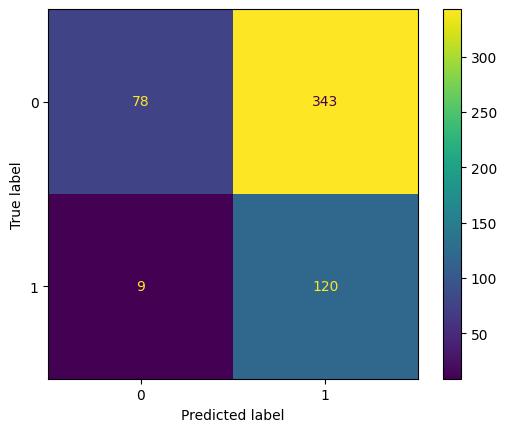

In [7]:
ConfusionMatrixDisplay(confusion_matrix(*get_golds_preds(data[0]))).plot()

In [8]:
recover_split([item['id_original'] for item in read_jsonl('results/clm_llama_nt.jsonl')[1] if item['gold'] == 1 and item['pred'] == 1], df)

[{'source': 'twitter',
  'subreddit': None,
  'id_original': '1534755822562967553',
  'text': '@Saralily24 Mine does, thank goodness  grinning face with sweat .',
  'parent_id_original': '1528728063105716227',
  'parent_text': 'Do men still cook &amp;wash the dishes????',
  'Language_instance': 'en',
  'label': 1},
 {'source': 'twitter',
  'subreddit': None,
  'id_original': '1537824575718932482',
  'text': '@dunkingwithfish  smiling face with hearts ',
  'parent_id_original': '1537824377647030272',
  'parent_text': '@ElaineARoche Hurrah!  clapping hands  clapping hands  clapping hands  clapping hands  well done that boy!',
  'Language_instance': 'en',
  'label': 1},
 {'source': 'twitter',
  'subreddit': None,
  'id_original': '1537907713924997121',
  'text': '@for_grandson Has she been back since she was elected?',
  'parent_id_original': '1537649254558212103',
  'parent_text': "I live in a lovely village but it's in Nadine Dorries: constituency. Help! Pro  European, climate, love and

## Losses 

In [9]:
def plot_loss(states):
    best_split = np.argmax([state['best_metric'] for state in states])
    states[best_split]
    losses = []

    for i in range(0, len(states[best_split]['log_history'])-1, 2):
        losses.append((i / 2, states[best_split]['log_history'][i]['loss'], 'train'))
        losses.append((i / 2, states[best_split]['log_history'][i+1]['eval_loss'], 'val'))
    

    losses_df = pd.DataFrame(losses, columns=['epoch', 'loss', 'train_val'])

    sns.lineplot(
        data = losses_df,
        x = 'epoch',
        y = 'loss',
        hue = 'train_val'
    )
    

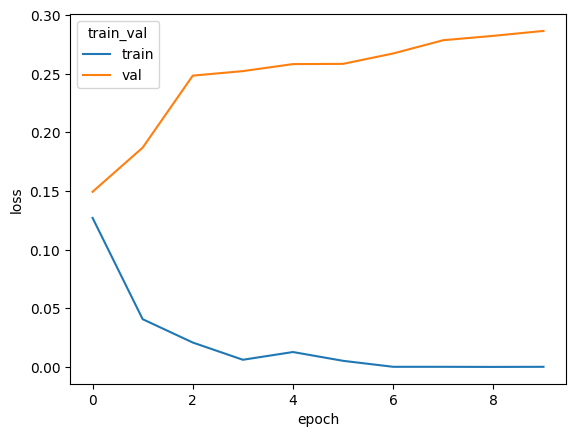

In [10]:
states = read_jsonl('results/roberta-irony-ft_loss.jsonl')
plot_loss(states)

In [84]:
DATASET_NAME = "CreativeLang/EPIC_Irony"
df = make_dataset(pd.DataFrame(load_dataset(DATASET_NAME)['train']))
data = read_jsonl('results/clm_llama_nt.jsonl')


In [97]:
for item in data:
    for i in item:
        print(i['gold'])

1
0
0
0
1
0
0
0
1
0
1
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
1
0
0
0
0
1
1
0
1
0
0
1
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
0
1
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
1
0
0
1
0
0
1
0
0
0
0
0
1
0
1
0
1
0
0
1
0
1
0
1
0
0
1
1
1
0
0
1
0
0
0
0
1
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
1
0
1
0
1
0
0
1
1
0
1
1
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
1
0
1
0
0
0
1
0
0
0
1
0
1
0
1
0
0
1
0
0
0
0
1
1
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
1
1
0
1
0
0
0
1
1
1
1
0
0
0
1
1
0
0
1
0
1
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
0
0
0
0
0
0
0
0
0


In [42]:
df.head(5)

,source,subreddit,id_original,text,parent_id_original,parent_text,Language_instance,label
0,twitter,None,1533769730712121344,@liamgallagher Piss all over the Beatles??? U ...,1528479461787697153,Eh carra you got shit banter for a scouser fuc...,en,1
1,twitter,None,1534473362327863296,@garyvee @veefriends I don’t own any but defin...,1520761816917454848,Would love to see your @veefriends pls share i...,en,1
2,twitter,None,1534737502254374912,@TwitterBlue The badge would be interesting. I...,1517541835245203457,police car light back at it again with anoth...,en,0
3,twitter,None,1534755822562967553,"@Saralily24 Mine does, thank goodness grinnin...",1528728063105716227,Do men still cook &amp;wash the dishes????,en,1
4,twitter,None,1535259618838036481,@sick20034 Yes you can. ;),1535155878760001536,@FymmG Hi I wanted to ask if we can still emai...,en,0


In [111]:
golds = []
preds = []
for item in data:
    for el in item:
        golds.append(el['gold'])
        preds.append(el['pred'])

sequence_lengths = [len(text) for text in df.text]
print(sequence_lengths)

[147, 94, 111, 65, 26, 111, 56, 238, 50, 344, 112, 66, 47, 29, 115, 110, 269, 256, 111, 34, 43, 37, 71, 76, 231, 164, 63, 29, 88, 75, 299, 29, 53, 302, 40, 54, 32, 330, 143, 27, 188, 87, 84, 165, 72, 82, 193, 162, 84, 54, 76, 115, 55, 35, 239, 114, 45, 63, 199, 194, 106, 95, 290, 155, 162, 45, 143, 41, 109, 105, 36, 26, 297, 60, 65, 178, 54, 77, 23, 169, 109, 52, 171, 96, 61, 125, 193, 46, 334, 95, 37, 51, 69, 84, 46, 70, 55, 31, 65, 72, 97, 29, 43, 73, 204, 37, 36, 65, 76, 52, 226, 60, 202, 30, 232, 117, 87, 114, 110, 102, 37, 121, 242, 182, 145, 92, 140, 101, 169, 69, 182, 64, 153, 250, 186, 82, 222, 25, 346, 93, 98, 51, 104, 44, 34, 44, 61, 42, 118, 48, 157, 78, 109, 88, 193, 19, 269, 186, 53, 186, 136, 28, 130, 298, 42, 31, 127, 42, 182, 53, 34, 193, 47, 50, 44, 190, 170, 105, 56, 116, 289, 96, 93, 58, 44, 33, 104, 63, 160, 97, 82, 65, 33, 44, 30, 28, 363, 43, 174, 25, 58, 95, 162, 27, 65, 78, 83, 49, 156, 61, 294, 94, 53, 145, 69, 62, 82, 67, 51, 66, 127, 94, 44, 63, 18, 24, 335, 

In [112]:
golds = []
preds = []
for item in data:
    for el in item:
        golds.append(el['gold'])
        preds.append(el['pred'])

sequence_lengths = [len(text) for text in df.text]

short_sequences = [0, 50]
medium_sequences = [51, 100]
long_sequences = [101, 200]

short_TP, short_FP, short_TN, short_FN = 0, 0, 0, 0
medium_TP, medium_FP, medium_TN, medium_FN = 0, 0, 0, 0
long_TP, long_FP, long_TN, long_FN = 0, 0, 0, 0

for i in range(len(data)):
    sequence_length = sequence_lengths[i]
    if sequence_length >= short_sequences[0] and sequence_length <= short_sequences[1]:
        if golds[i] == 1 and preds[i] == 1:
            short_TP += 1
        elif golds[i] == 0 and preds[i] == 1:
            short_FP += 1
        elif golds[i] == 0 and preds[i] == 0:
            short_TN += 1
        else:
            short_FN += 1
    elif sequence_length >= medium_sequences[0] and sequence_length <= medium_sequences[1]:
        if golds[i] == 1 and preds[i] == 1:
            medium_TP += 1
        elif golds[i] == 0 and preds[i] == 1:
            medium_FP += 1
        elif golds[i] == 0 and preds[i] == 0:
            medium_TN += 1
        else:
            medium_FN += 1
    else:
        if golds[i] == 1 and preds[i] == 1:
            long_TP += 1
        elif golds[i] == 0 and preds[i] == 1:
            long_FP += 1
        elif golds[i] == 0 and preds[i] == 0:
            long_TN += 1
        else:
            long_FN += 1



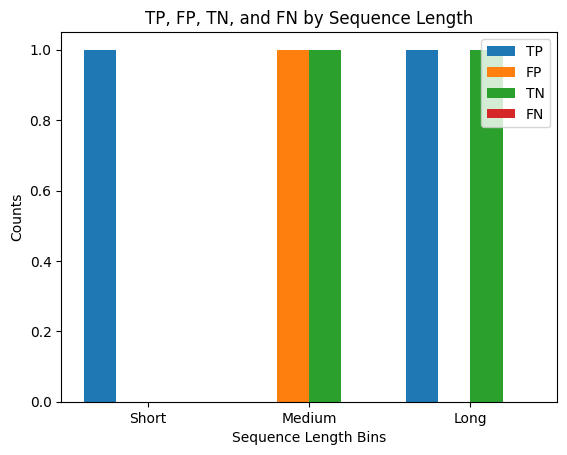

In [114]:

sequence_bins = ['Short', 'Medium', 'Long']
TP = [short_TP, medium_TP, long_TP]
FP = [short_FP, medium_FP, long_FP]
TN = [short_TN, medium_TN, long_TN]
FN = [short_FN, medium_FN, long_FN]

width = 0.2
x = range(len(sequence_bins))
fig, ax = plt.subplots()

bar1 = ax.bar(x, TP, width, label='TP')
bar2 = ax.bar([i + width for i in x], FP, width, label='FP')
bar3 = ax.bar([i + width * 2 for i in x], TN, width, label='TN')
bar4 = ax.bar([i + width * 3 for i in x], FN, width, label='FN')

ax.set_xlabel('Sequence Length Bins')
ax.set_ylabel('Counts')
ax.set_title('TP, FP, TN, and FN by Sequence Length')
ax.set_xticks([i + 1.5 * width for i in x])
ax.set_xticklabels(sequence_bins)
ax.legend()

plt.show()


In [115]:
import pandas as pd

data_seq_len = {
    'Sequence Length': sequence_bins,
    'TP': TP,
    'FP': FP,
    'TN': TN,
    'FN': FN
}

df_data = pd.DataFrame(data_seq_len)
print(df_data)


  Sequence Length  TP  FP  TN  FN
0           Short   1   0   0   0
1          Medium   0   1   1   0
2            Long   1   0   1   0
